<a href="https://colab.research.google.com/github/96068chandra/Sentimental-Labelled-Sentences-Data-Analysis/blob/main/Sentimental_Labelled_Sentences_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1: Preprocessing Textual Data**

In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure you have NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
# Download the punkt_tab data package
nltk.download('punkt_tab')  # This line is added to download the required resource

# Load dataset (replace with actual file path or URL)
# For example, we assume a dataset with "sentence" and "label" columns
data = pd.read_csv('/yelp_labelled.txt', sep='\t', header=None, names=['sentence', 'label'])

# Display raw data
print("Raw Data:")
print(data.head())

# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()

# Preprocessing Function
def preprocess_text(text):
    # 1. Remove punctuation
    text_no_punct = re.sub(r'[^\w\s]', '', text)
    # 2. Remove numbers
    text_no_numbers = re.sub(r'\d+', '', text_no_punct)
    # 3. Convert to lowercase
    text_lower = text_no_numbers.lower()
    # 4. Tokenize and remove stop words
    tokens = nltk.word_tokenize(text_lower)
    stop_words = set(stopwords.words('english'))
    tokens_no_stop = [word for word in tokens if word not in stop_words]
    # 5. Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens_no_stop]
    # Join tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

# Apply preprocessing
data['processed_sentence'] = data['sentence'].apply(preprocess_text)

# Display Results
print("\nPreprocessed Data (First 3 Examples):")
for i in range(3):
    print(f"Original: {data['sentence'][i]}")
    print(f"Processed: {data['processed_sentence'][i]}")

# Save to file (optional)
data.to_csv('preprocessed_data.csv', index=False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Raw Data:
                                            sentence  label
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1

Preprocessed Data (First 3 Examples):
Original: Wow... Loved this place.
Processed: wow loved place
Original: Crust is not good.
Processed: crust good
Original: Not tasty and the texture was just nasty.
Processed: tasty texture nasty


Task 2: Classification Using Bag-of-Words

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        96
           1       0.84      0.73      0.78       104

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.79      0.79      0.78       200

=== Naive Bayes ===
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        96
           1       0.76      0.76      0.76       104

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200

=== SVM ===
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        96
           1       0.80      0.75      0.78       104

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg  

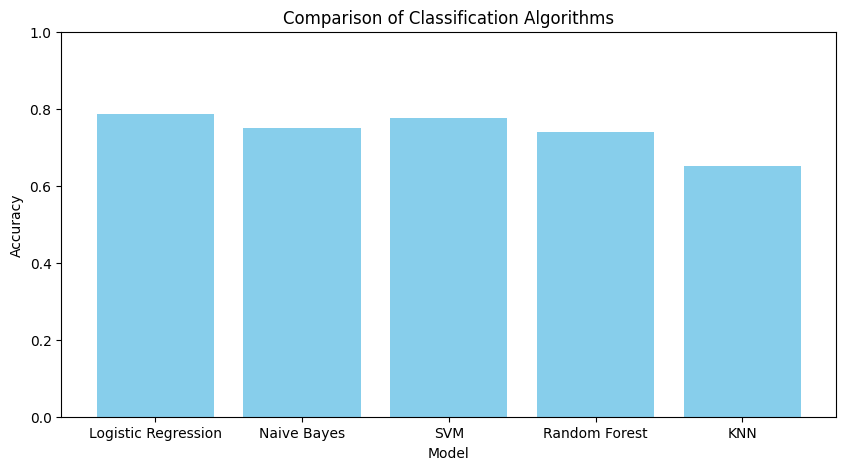

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load preprocessed data
data = pd.read_csv('preprocessed_data.csv')

# Bag-of-Words Representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['processed_sentence'])
y = data['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate each model
results = []
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    results.append((model_name, accuracy))
    # Print classification report for each model
    print(f"=== {model_name} ===")
    print(classification_report(y_test, y_pred))

# Display results in a table
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
print("\nOverall Results:")
print(results_df)

# Plot results
plt.figure(figsize=(10, 5))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Algorithms')
plt.ylim(0, 1)
plt.show()


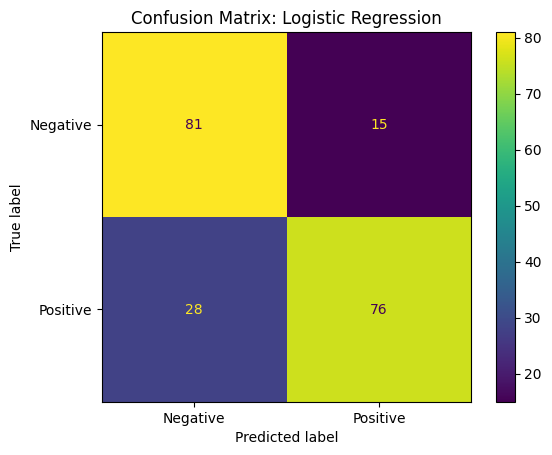

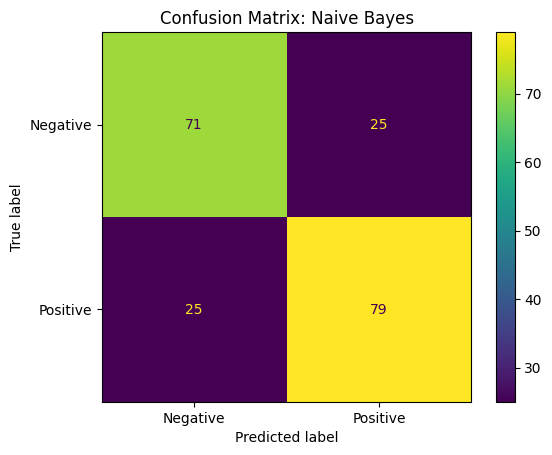

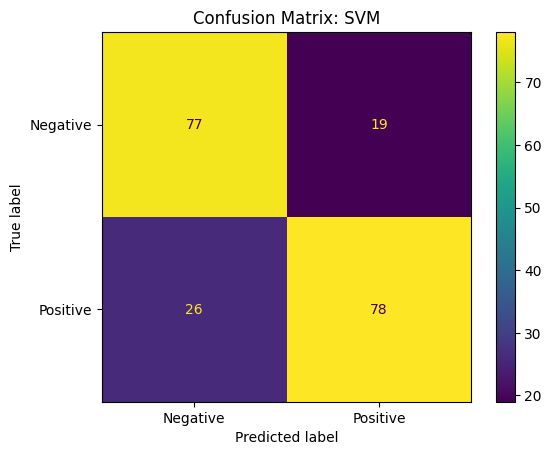

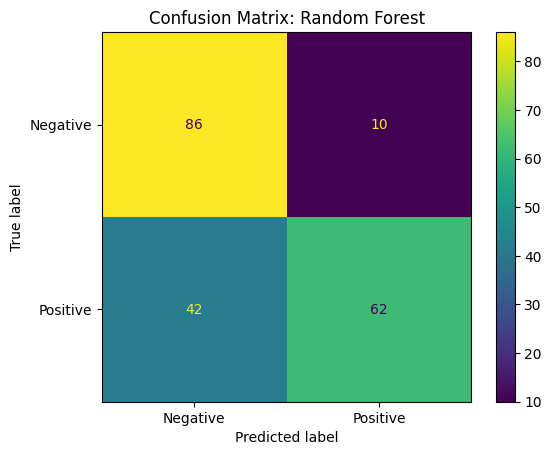

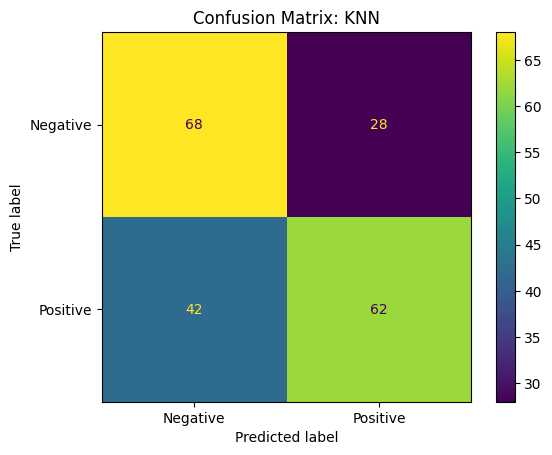

In [4]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrices for all models
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Negative", "Positive"])
    disp.ax_.set_title(f"Confusion Matrix: {model_name}")
    plt.show()


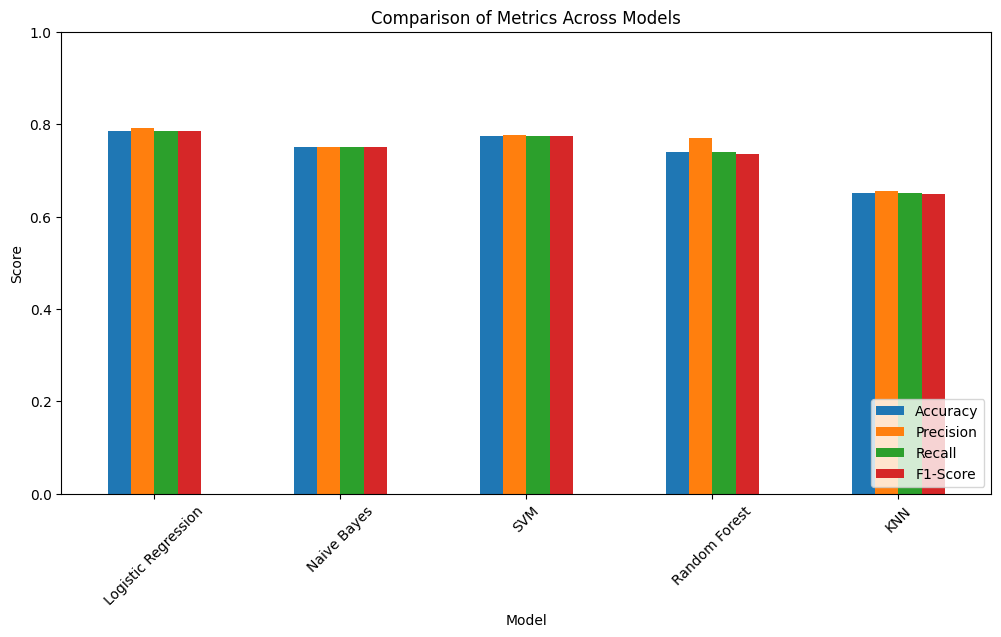

In [5]:
import numpy as np

# Collect performance metrics for each model
metrics = []
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics.append([report['accuracy'], report['weighted avg']['precision'],
                    report['weighted avg']['recall'], report['weighted avg']['f1-score']])

metrics_df = pd.DataFrame(metrics, columns=["Accuracy", "Precision", "Recall", "F1-Score"], index=models.keys())

# Plot grouped bar chart
metrics_df.plot(kind="bar", figsize=(12, 6), rot=45)
plt.title("Comparison of Metrics Across Models")
plt.ylabel("Score")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()


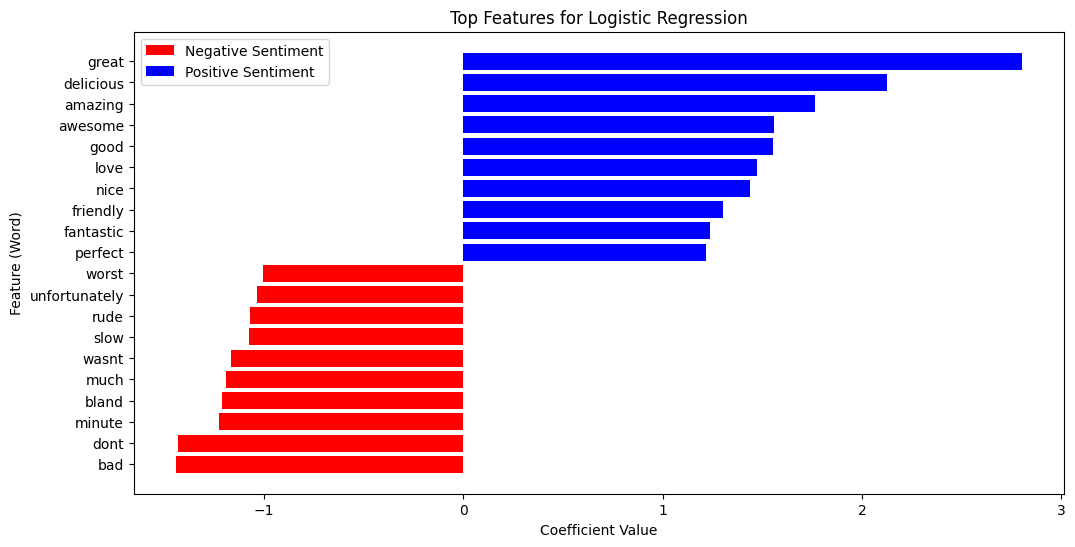

In [6]:
# Extract feature importance for Logistic Regression
lr_model = models['Logistic Regression']
feature_names = vectorizer.get_feature_names_out()
coefficients = lr_model.coef_[0]
top_indices = coefficients.argsort()[-10:]  # Top 10 features
bottom_indices = coefficients.argsort()[:10]  # Bottom 10 features

# Plot top and bottom coefficients
plt.figure(figsize=(12, 6))
plt.barh([feature_names[i] for i in bottom_indices], coefficients[bottom_indices], color='red', label='Negative Sentiment')
plt.barh([feature_names[i] for i in top_indices], coefficients[top_indices], color='blue', label='Positive Sentiment')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature (Word)')
plt.title('Top Features for Logistic Regression')
plt.legend()
plt.show()


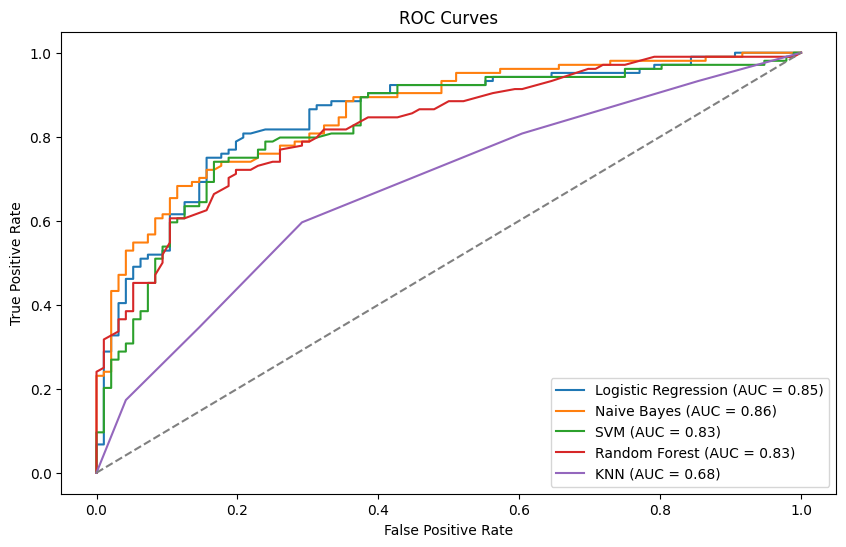

In [7]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Prepare binary labels for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1])[:, 0]

plt.figure(figsize=(10, 6))

# Plot ROC curve for each model
for model_name, model in models.items():
    y_score = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test_bin, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


**Classification Using a BERT-based Model**

In [12]:
import pandas as pd
import torch
!pip install datasets transformers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
from datasets import Dataset

# Load the preprocessed data
data = pd.read_csv('preprocessed_data.csv')

# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    data['processed_sentence'], data['label'], test_size=0.2, random_state=42
)

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the data
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

train_data = Dataset.from_dict({"text": train_texts, "label": train_labels})
val_data = Dataset.from_dict({"text": val_texts, "label": val_labels})

train_data = train_data.map(tokenize_function, batched=True)
val_data = val_data.map(tokenize_function, batched=True)

# Format datasets for PyTorch
train_data = train_data.remove_columns(["text"])
val_data = val_data.remove_columns(["text"])

train_data.set_format("torch")
val_data.set_format("torch")

# Load the BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    save_total_limit=1
)

# Use a data collator for dynamic padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Define Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=val_data,
    tokenizer=tokenizer,
    data_collator=data_collator
)

# Train the model
trainer.train()

# Evaluate the model
predictions = trainer.predict(val_data)
predicted_labels = torch.argmax(torch.tensor(predictions.predictions), axis=1).numpy()
true_labels = val_labels.to_numpy()

# Print classification report
print("=== BERT Classification Results ===")
print(classification_report(true_labels, predicted_labels))
print(f"Accuracy: {accuracy_score(true_labels, predicted_labels):.2f}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-12-c43ef72f0b58>:59: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss
1,0.525000,0.521764
2,0.306500,0.467403
3,0.191800,0.396371


=== BERT Classification Results ===
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        96
           1       0.87      0.80      0.83       104

    accuracy                           0.83       200
   macro avg       0.84      0.84      0.83       200
weighted avg       0.84      0.83      0.83       200

Accuracy: 0.83


**Task 4: Topic Detection**